# The Logistic Growth Model as It Relates to Measures of Microbial Growth

Author: Paul Magwene

Date: 27 February 2016
-  - -

## Logistic growth model

Standard logistic growth model

$$
\frac{dN}{dt} = N (r - \frac{r}{k}N )  
$$

Where $K$ is the carrying capacity and $r$ is the rate of intrinsic growth.

Let

$$
R_0 = \frac{K-n_0}{n_0}
$$

then

$$
N(t) = \frac{K}{1 + R_0 e^{-rt}} 
$$

The time to half-maximum population size ($\frac{K}{2}$) is

$$
t_{1/2} = \frac{1}{r} \ln R_0
$$

The slope at $t_{1/2}$ is the inflection point of the sigmoid curve and thus the maximum growth rate, $\mu$, where

$$
\mu = \frac{Kr}{4}
$$

The lag, $\lambda$, is the $x$-intercept for the tangent line at $t_{1/2}$. 

The standard equation for a line is $y = mx +b$ where $m$ is the slope, $b$ is the $y$-intercept. From this we find tht the $x$-intercept is given by $-\frac{b}{m}$.

Applying this to our model, $m = \mu$, 

\begin{eqnarray*}
b &=& \frac{K}{2} - \mu t_{1/2} \\ \\
  &=& \frac{K}{2}(1 - \frac{1}{2} \ln R_{0})
\end{eqnarray*}

and therefore the $x$-intercept is

\begin{eqnarray*}
\lambda &=& -\frac{b}{m} \\ \\
        &=& -\frac{b}{\mu} \\ \\
        &=& -\frac{\frac{K}{2}(1 - \frac{1}{2} \ln R_{0})}{\frac{Kr}{4}} \\ \\
        &=& \frac{1}{r}(\ln R_0 - 2)
\end{eqnarray*}

Notice in particular that the lag, $\lambda$ is predicted to be inversely related to maximum growth rate $\lambda$.

So, to summarize, when we express the parameters of the fit growth curves to the logistic growth equation we find:

\begin{eqnarray*}
\mbox{maximum growth rate:} & \mu &=& \frac{Kr}{4} \\ \\
\mbox{lag:} &\lambda &=& \frac{1}{r}(\ln \frac{K - n_0}{n_0} - 2)  \\ \\
\mbox{capacity:} &A  & = & K
\end{eqnarray*}

None of the parameters estimated from the growth curves are independent.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def Nt(r, K, n0, t):
    return K/(1 + ((K-n0)/n0) * np.exp(-r*t))

def tau(r, K, n0):
    """Time to half max (K/2)"""
    return (1.0/r)*np.log((K-n0)/n0)

def mu(r, K):
    """Maximum growth rate (slope)"""
    return 0.25 * K * r

def lag(r, K, n0):
    """lag time (lambda)"""
    return (1.0/r) * (np.log((K-n0)/n0) - 2)

def capacity(K):
    return K

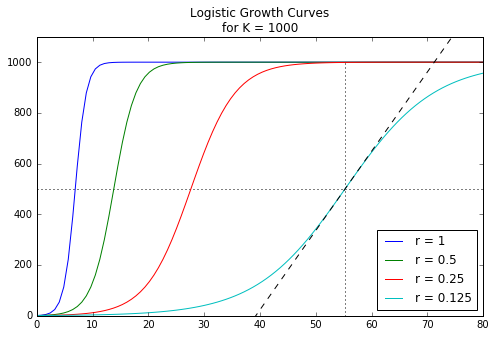

In [42]:
n0 = 1
K = 1000
r = np.linspace(1,0.125,100)
t = np.linspace(0,80,100)

rs = np.array([1,0.5,0.25,0.125])

fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(8,5)

ax1.plot(t, Nt(1, K,  n0, t), label="r = 1")
ax1.plot(t, Nt(0.5, K,  n0, t), label="r = 0.5")
ax1.plot(t, Nt(0.25, K,  n0, t), label="r = 0.25")
ax1.plot(t, Nt(0.125, K,  n0, t), label="r = 0.125")
ax1.hlines(K/2, min(t), max(t), linestyle='dotted')

t125 = tau(0.125, K, n0)
mu125 = mu(0.125, K)
ax1.vlines(t125, 0, K, linestyle='dotted')
ax1.plot([t125 - 50, t125, t125 + 50], 
         [K/2 - 50*mu125, K/2, K/2 + 50*mu125], 
         color='black', linestyle='dashed')

ax1.set_ylim(0, K*1.1)
ax1.set_xlim(0, max(t))
ax1.set_title("Logistic Growth Curves\nfor K = 1000")
ax1.legend(loc='best')

pass

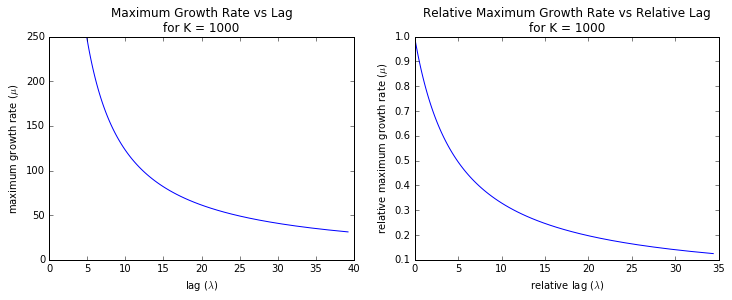

In [45]:
n0 = 1
K = 1000
r = np.linspace(1,0.125,100)
t = np.linspace(0,80,100)

rs = np.array([1,0.5,0.25,0.125])
lags = lag(r, K, n0)
mus = mu(r, K)

fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(12,4)

ax1.plot(lags, mus)
ax1.set_xlabel('lag ($\lambda$)')
ax1.set_ylabel('maximum growth rate ($\mu$)')
ax1.set_title("Maximum Growth Rate vs Lag\nfor K = 1000")

ax2.plot(lags - lags[0], mus/mus[0])
ax2.set_xlabel('relative lag ($\lambda$)')
ax2.set_ylabel('relative maximum growth rate ($\mu$)')
ax2.set_title("Relative Maximum Growth Rate vs Relative Lag\nfor K = 1000")

pass

## Lag vs Reciprocal of Maximum Growth Rate

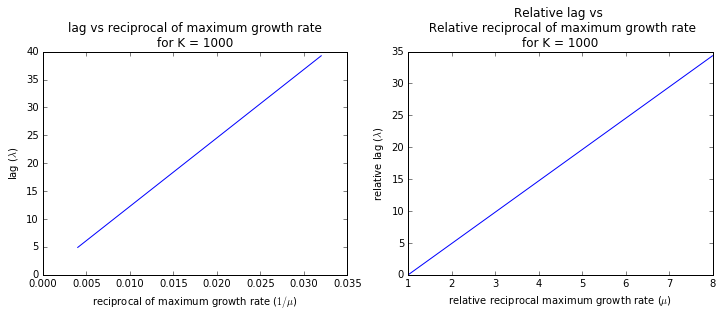

In [107]:
n0 = 1
K = 1000
r = np.linspace(1,0.125,100)
t = np.linspace(0,80,100)

rs = np.array([1,0.5,0.25,0.125])
lags = lag(r, K, n0)
mus = mu(r, K)

fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(12,4)

ax1.plot(1/mus,lags)
ax1.set_xlabel('reciprocal of maximum growth rate ($1/\mu$)')
ax1.set_ylabel('lag ($\lambda$)')
ax1.set_title("lag vs reciprocal of maximum growth rate\nfor K = 1000")

ax2.plot((1/mus)/(1/mus[0]), lags - lags[0])
ax2.set_xlabel('relative reciprocal maximum growth rate ($\mu$)')
ax2.set_ylabel('relative lag ($\lambda$)')
ax2.set_title("Relative lag vs \n Relative reciprocal of maximum growth rate\nfor K = 1000")

pass

## Lag and maximum growth rate as a function of r and K


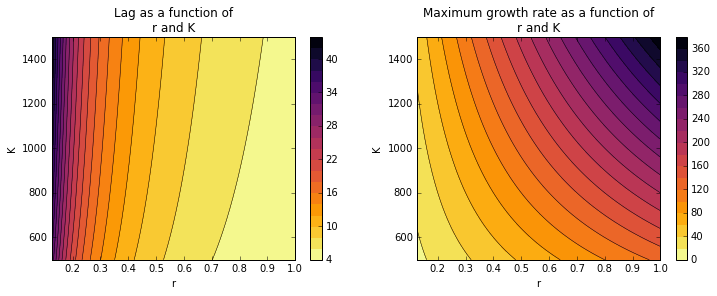

In [76]:
n0 = 1

K = np.linspace(500, 1500, 100)
r = np.linspace(1, 0.125, 100)


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12,4)


X,Y = np.meshgrid(r,K)

lagZ = lag(X, Y, n0)
levels = plt.MaxNLocator(nbins=20).tick_values(lagZ.min(), lagZ.max())
im = ax1.contourf(X,Y,lagZ, cmap="inferno_r", levels=levels)
ax1.contour(X, Y, lagZ, levels,
                  colors=('k',),
                  linewidths=(0.5,))
fig.colorbar(im, ax=ax1)
ax1.set_xlabel("r")
ax1.set_ylabel("K")
ax1.set_title("Lag as a function of\nr and K")

muZ = mu(X, Y)
mulevels = plt.MaxNLocator(nbins=20).tick_values(muZ.min(), muZ.max())
im2 = ax2.contourf(X, Y, muZ, cmap="inferno_r", levels=mulevels)
ax2.contour(X, Y, muZ, mulevels,
                  colors=('k',),
                  linewidths=(0.5,))
fig.colorbar(im2, ax=ax2)
ax2.set_xlabel("r")
ax2.set_ylabel("K")
ax2.set_title("Maximum growth rate as a function of\nr and K")


pass

## Random variation in underlying parameters

How does random variation in the underlying growth parameters, $r$ and $k$, affect the relationship betwen maximum growth rate and lag?

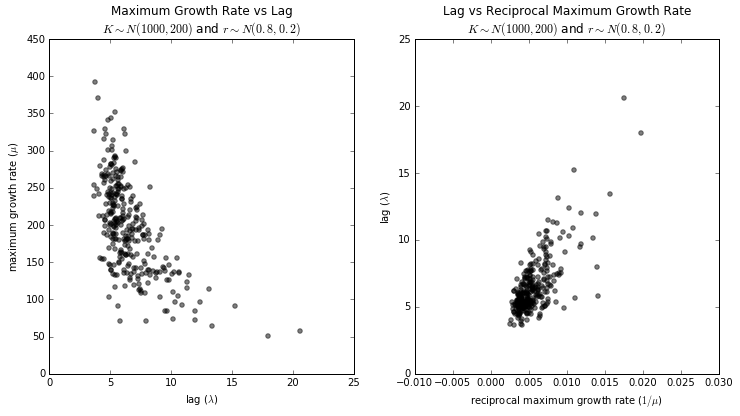

In [113]:
np.random.seed(20130225)
n0 = 1
K = np.random.normal(1000, 200, size=300)
r = np.abs(np.random.normal(0.8,0.2,size=300))

lags = lag(r, K, n0)
mus = mu(r, K)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(12,6)

ax1.scatter(lags, mus, color='black', alpha=0.5)
ax1.set_xlabel('lag ($\lambda$)')
ax1.set_ylabel('maximum growth rate ($\mu$)')
ax1.set_title(r"""Maximum Growth Rate vs Lag
$K \sim N(1000,200)$ and $r \sim N(0.8,0.2)$""")

ax2.scatter(1/mus, lags, color='black', alpha=0.5)
ax2.set_xlabel('reciprocal maximum growth rate ($1/\mu$)')
ax2.set_ylabel('lag ($\lambda$)')

ax2.set_title(r"""Lag vs Reciprocal Maximum Growth Rate
$K \sim N(1000,200)$ and $r \sim N(0.8,0.2)$""")

pass